# PROBLEM STATEMENT

*Implementation of Back Propation*

1. Import Libraries
2. Load the Dataset
3. Initialize hyperparameters and weights
4. Building back Propagation

The Dataset is a Red-Wine Quality Dataset

### Module 1 : Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD

<hr>

### Module 2 : Loading the Dataset, Pre-Processing and Data Preparation

In [ ]:
df = pd.read_csv("./winequality-red.csv")

print(df['quality'].value_counts(), end=" ")

def quality_to_label(quality):
    if quality <= 5:
        return 0
    else:
        return 1

df['quality_class'] = df['quality'].apply(quality_to_label)

df.head(2)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0


Basic Preprocessing

In [ ]:
print(df.shape)
df = df.dropna(axis=0, how='any')
print(df.shape)

(1599, 13)
(1599, 13)


Splitting of the Dataset

In [ ]:
X = df.drop(['quality','quality_class'], axis = 'columns')
Y = df['quality_class']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X_train.shape, end="\t")
print(y_train.shape)

print(X_test.shape, end="\t")
print(y_test.shape)

(1119, 11)	(1119,)
(480, 11)	(480,)


<hr>

### Module 3 : Initilization of the Hyperparamteres and Weights

Hyperparameters

In [ ]:
learning_rate = 0.05
iterations = 100
N = y_train.size

# Input features
input_size = 11
# Hidden layers
hidden_size = 1
# Output layer
output_size = 2

lambda_reg = 0.01

Weights

In [ ]:
np.random.seed(10)

# Hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))
# Output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size))

Creating Helper Functions for Scores and Accuracy

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    y_true_one_hot = np.eye(output_size)[y_true]

    y_true_reshaped = y_true_one_hot.reshape(y_pred.shape)

    error = ((y_pred - y_true_reshaped)**2).sum() / (2*y_pred.size)

    return error

def accuracy(y_pred, y_true):
    pred_labels = np.argmax(y_pred, axis=1)
    true_labels = np.argmax(y_true, axis=1)
    acc = (pred_labels == true_labels).mean()
    return acc

results = pd.DataFrame(columns=["mse", "accuracy"])

<hr>

### Module 4 : Building the Backpropagation Model

In [ ]:
for itr in range(iterations):
  # Feedforward propagation
  Z1 = np.dot(X_train, W1)
  A1 = sigmoid(Z1)
  Z2 = np.dot(A1, W2)
  A2 = sigmoid(Z2)

  # Calculate error
  mse = mean_squared_error(A2, y_train)
  acc = accuracy(A2, np.eye(output_size)[y_train])
  new_row = pd.DataFrame({"mse": [mse], "accuracy": [acc]})
  results = pd.concat([results, new_row], ignore_index=True)

  # Backpropagation
  E2 = A2 - np.eye(output_size)[y_train]
  dZ2 = E2 * A2 * (1 - A2)  # Derivative of sigmoid function
  dW2 = np.dot(A1.T, dZ2) / N + lambda_reg * W2 / N  # Regularization term added
  E1 = np.dot(dZ2, W2.T)
  dZ1 = E1 * A1 * (1 - A1)  # Derivative of sigmoid function
  dW1 = np.dot(X_train.T, dZ1) / N + lambda_reg * W1 / N  # Regularization term added

  # Update weights
  W2 -= learning_rate * dW2
  W1 -= learning_rate * dW1

Model Accuracy

In [ ]:
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)
test_acc = accuracy(np.eye(output_size)[y_test], A2)
print("Test accuracy: {}".format(test_acc))

Test accuracy: 0.44375


Observing the Decrease in Mean Squared Error, hence improvement..

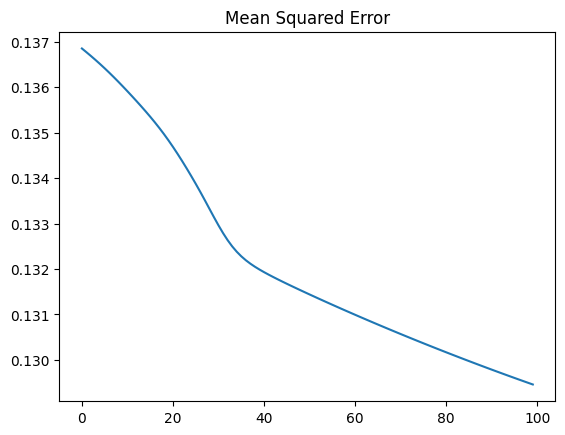

In [ ]:
results.mse.plot(title="Mean Squared Error")
plt.show()

<hr><hr>